### Importación librerias requeridas
### Obtener conexión y generar consulta ppal

In [79]:
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import tkinter as tk
from tkcalendar import Calendar

load_dotenv()

%run conexionDB.ipynb

# Obtener la conexión
engine = obtener_conexion()

#### Calcular fechas dinámicamente permitiendo al usuario seleccionarlas a través de un Calendario

#### Análisis de todos los Tickets recibidos por todas las áreas de la entidad.

In [80]:
# Variable global para almacenar el dataframe
df = None

# Función para obtener la fecha seleccionada
def obtener_fechas():
    global df  # Usar la variable global

    # Obtiene las fechas seleccionadas
    fecha_inicio = calendar_inicio.get_date()
    fecha_fin = calendar_fin.get_date()
    
    # Convertir las fechas a formato adecuado
    fecha_inicio = str(fecha_inicio)
    fecha_fin = str(fecha_fin)
    
    # Crear la consulta SQL con las fechas seleccionadas
    query = f"""
    SELECT os.number AS 'No', 
    	   dep.id,
           dep.name,       
    	   osd.priority,
           tp.priority as npriority,
    	   sla.grace_period,
           ht.topic,
           sla.name AS 'Sla',
           osd.subject as Titulo, 
           DATE_ADD(os.created, INTERVAL -6 HOUR) as Creado,
           DATE_ADD(os.closed, INTERVAL -6 HOUR) as Cerrado, 
           DATE_ADD(os.reopened, INTERVAL -6 HOUR) as Reabierto,
    	   us.name AS 'Usuario'
    FROM ost_ticket AS os
    LEFT JOIN ost_ticket__cdata AS osd ON os.ticket_id = osd.ticket_id
    LEFT JOIN ost_sla AS sla ON os.sla_id = sla.id
    LEFT JOIN ost_help_topic AS ht ON os.topic_id = ht.topic_id
    LEFT JOIN ost_ticket_priority AS tp ON osd.priority = tp.priority_id
    LEFT JOIN ost_department AS dep ON os.dept_id = dep.id
    LEFT JOIN ost_user AS us ON os.user_id = us.id
    WHERE DATE_ADD(os.created, INTERVAL -6 HOUR) BETWEEN '{fecha_inicio}' AND DATE_ADD('{fecha_fin}', INTERVAL 1 DAY)
    ORDER BY os.created
    """    
    
    # Imprimir la consulta para verificar
    print(query)
    
    # Ejecutar la consulta y almacenar los resultados en la variable global
    df = pd.read_sql(query, engine)
    
    # Cerrar la ventana
    ventana.destroy()
    #Aca finaliza la función obtener_fechas()

# Crear la ventana principal
ventana = tk.Tk()
ventana.title("Seleccionar Fechas")

# Etiquetas
tk.Label(ventana, text="Fecha Inicial").grid(row=0, column=0, padx=10, pady=10)
tk.Label(ventana, text="Fecha Final").grid(row=1, column=0, padx=10, pady=10)

# Crear calendario para la fecha de inicio
calendar_inicio = Calendar(ventana, date_pattern='yyyy-mm-dd', locale="es_ES",
                          background = "blue",
                          foreground = "white",
                          selectbackground = "red",
                          normalbackground = "lightblue",
                          weekendbackground = "darkblue",
                          weekendforeground = "white")                          
calendar_inicio.grid(row=0, column=1, padx=10, pady=10)

# Crear calendario para la fecha de fin
calendar_fin = Calendar(ventana, date_pattern='yyyy-mm-dd', locale="es_ES",
                          background = "blue",
                          foreground = "white",
                          selectbackground = "red",
                          normalbackground = "lightblue",
                          weekendbackground = "darkblue",
                          weekendforeground = "white")                          
calendar_fin.grid(row=1, column=1, padx=10, pady=10)

# Botón para obtener las fechas y ejecutar la consulta llamando la función previamente creada obtener_fechas()
boton = tk.Button(ventana, text="Obtener resultados", command=obtener_fechas)
boton.grid(row=2, column=0, columnspan=2, pady=20)

# Iniciar la interfaz
ventana.mainloop()

# Imprimir el dataframe global después de que la ventana se cierre
if df is not None:
    print(df)


    SELECT os.number AS 'No', 
    	   dep.id,
           dep.name,       
    	   osd.priority,
           tp.priority as npriority,
    	   sla.grace_period,
           ht.topic,
           sla.name AS 'Sla',
           osd.subject as Titulo, 
           DATE_ADD(os.created, INTERVAL -6 HOUR) as Creado,
           DATE_ADD(os.closed, INTERVAL -6 HOUR) as Cerrado, 
           DATE_ADD(os.reopened, INTERVAL -6 HOUR) as Reabierto,
    	   us.name AS 'Usuario'
    FROM ost_ticket AS os
    LEFT JOIN ost_ticket__cdata AS osd ON os.ticket_id = osd.ticket_id
    LEFT JOIN ost_sla AS sla ON os.sla_id = sla.id
    LEFT JOIN ost_help_topic AS ht ON os.topic_id = ht.topic_id
    LEFT JOIN ost_ticket_priority AS tp ON osd.priority = tp.priority_id
    LEFT JOIN ost_department AS dep ON os.dept_id = dep.id
    LEFT JOIN ost_user AS us ON os.user_id = us.id
    WHERE DATE_ADD(os.created, INTERVAL -6 HOUR) BETWEEN '2019-02-01' AND DATE_ADD('2025-01-25', INTERVAL 1 DAY)
    ORDER BY os.created
    

### Revisar la estructura del DataFrame

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   No            41373 non-null  object        
 1   id            41373 non-null  int64         
 2   name          41373 non-null  object        
 3   priority      41373 non-null  object        
 4   npriority     41373 non-null  object        
 5   grace_period  38608 non-null  float64       
 6   topic         41373 non-null  object        
 7   Sla           38608 non-null  object        
 8   Titulo        41373 non-null  object        
 9   Creado        41373 non-null  datetime64[ns]
 10  Cerrado       41289 non-null  datetime64[ns]
 11  Reabierto     858 non-null    datetime64[ns]
 12  Usuario       41373 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(1), object(8)
memory usage: 4.1+ MB


### Identificar valores nulos

In [52]:
#df.isnull().values.any()
df.isnull().sum()

No                  0
id                  0
name                0
priority            0
npriority           0
grace_period     2765
topic               0
Sla              2765
Titulo              0
Creado              0
Cerrado            84
Reabierto       40515
Usuario             0
dtype: int64

### Revisar los tipos de datos
#### Que exista concordancia con el dato almacenado.

In [53]:
df.dtypes

No                      object
id                       int64
name                    object
priority                object
npriority               object
grace_period           float64
topic                   object
Sla                     object
Titulo                  object
Creado          datetime64[ns]
Cerrado         datetime64[ns]
Reabierto       datetime64[ns]
Usuario                 object
dtype: object

### Información estadística

In [54]:
df.describe()

,id,grace_period,Creado,Cerrado,Reabierto
count,41373.000000,38608.000000,41373,41289,858
mean,2.805985,46.314935,2022-06-30 03:59:14.754091008,2022-06-30 07:45:57.289205248,2023-01-14 01:57:13.518648064
min,1.000000,1.000000,2019-02-06 12:25:51,2019-02-06 15:04:03,2019-02-07 10:35:25
25%,2.000000,2.000000,2021-02-11 08:14:15,2021-02-11 14:56:03,2022-05-09 11:12:30.249999872
50%,3.000000,24.000000,2022-09-14 17:24:56,2022-09-15 12:12:52,2023-03-16 09:31:14
75%,3.000000,24.000000,2023-12-07 15:54:37,2023-12-07 14:39:46,2024-04-10 04:48:46.249999872
max,7.000000,720.000000,2025-01-24 17:57:33,2025-01-24 18:07:28,2025-01-24 17:36:36
std,1.311412,112.105558,NaN,NaN,NaN


In [55]:
# Obtener el tiempo transcurrido entre la fecha de creación y el cierre del ticket.
df["Diferencia_Cerrado"] = df["Cerrado"] - df["Creado"]
df

,No,id,name,priority,npriority,grace_period,topic,Sla,Titulo,Creado,Cerrado,Reabierto,Usuario,Diferencia_Cerrado
0,000001,1,TI - Administrativo,2,normal,24.0,Otros,Default SLA,Fallo en teclado.,2019-02-06 12:25:51,2025-01-10 16:12:22,2025-01-10 15:41:23,Pruebas TI,2165 days 03:46:31
1,000002,1,TI - Administrativo,2,normal,NaN,"Fallo PC (Equipo,Teclado,Mouse)",None,"Computador lento, difícil apagado",2019-02-06 14:17:34,2019-02-08 14:30:05,NaT,ANIBAL FAJARDO BARRETO,2 days 00:12:31
2,000003,2,Infraestructura,2,normal,24.0,Adecuaciones,Default SLA,PERSIANA,2019-02-06 14:26:51,2019-02-06 16:08:27,NaT,LUZ ELENA VALVERDE VALENCIA,0 days 01:41:36
3,000004,1,TI - Administrativo,2,normal,24.0,Otros,Default SLA,Fallo intranet,2019-02-06 14:55:12,2019-02-06 15:04:03,NaT,ARTURO MATEUS CAICEDO,0 days 00:08:51
4,000005,1,TI - Administrativo,2,normal,24.0,"Fallo PC (Equipo,Teclado,Mouse)",Default SLA,Rueda del mouse esta fallando,2019-02-06 15:00:22,2019-02-06 16:35:26,NaT,ADRIANA LUCIA YEPES VASQUEZ,0 days 01:35:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41368,041385,3,TI - Registro,2,normal,2.0,SII,TI - Normal,REASIGNACIÓN COD. 741833,2025-01-24 17:24:32,2025-01-24 18:01:33,NaT,ANA MARIA MOLINA HERNANDEZ,0 days 00:37:01
41369,041386,3,TI - Registro,2,normal,2.0,SII,TI - Normal,AJUSTE DE IMPUESTO DE REGISTRO,2025-01-24 17:25:47,2025-01-24 17:40:43,NaT,JOHN FREDDY VIDAL GARCIA,0 days 00:14:56
41370,041387,6,Jurídica,2,normal,24.0,Abogados / Modificación Kardex,Default SLA,742639,2025-01-24 17:39:30,NaT,NaT,ANA MARGARITA ZULUAGA MEJIA,NaT
41371,041388,1,TI - Administrativo,3,alta,1.0,Fallo Impresora y Escáner,TI - Alta,IMPRESION EN TAMAÑO OFICIO,2025-01-24 17:57:02,2025-01-24 18:07:28,NaT,PAULA CATALINA DIAZ PRADA,0 days 00:10:26


In [56]:
# Reemplazar los valores de la columna "id" donde el valor sea 3 por 1
df.loc[df["id"] == 3, "id"] = 1
df

,No,id,name,priority,npriority,grace_period,topic,Sla,Titulo,Creado,Cerrado,Reabierto,Usuario,Diferencia_Cerrado
0,000001,1,TI - Administrativo,2,normal,24.0,Otros,Default SLA,Fallo en teclado.,2019-02-06 12:25:51,2025-01-10 16:12:22,2025-01-10 15:41:23,Pruebas TI,2165 days 03:46:31
1,000002,1,TI - Administrativo,2,normal,NaN,"Fallo PC (Equipo,Teclado,Mouse)",None,"Computador lento, difícil apagado",2019-02-06 14:17:34,2019-02-08 14:30:05,NaT,ANIBAL FAJARDO BARRETO,2 days 00:12:31
2,000003,2,Infraestructura,2,normal,24.0,Adecuaciones,Default SLA,PERSIANA,2019-02-06 14:26:51,2019-02-06 16:08:27,NaT,LUZ ELENA VALVERDE VALENCIA,0 days 01:41:36
3,000004,1,TI - Administrativo,2,normal,24.0,Otros,Default SLA,Fallo intranet,2019-02-06 14:55:12,2019-02-06 15:04:03,NaT,ARTURO MATEUS CAICEDO,0 days 00:08:51
4,000005,1,TI - Administrativo,2,normal,24.0,"Fallo PC (Equipo,Teclado,Mouse)",Default SLA,Rueda del mouse esta fallando,2019-02-06 15:00:22,2019-02-06 16:35:26,NaT,ADRIANA LUCIA YEPES VASQUEZ,0 days 01:35:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41368,041385,1,TI - Registro,2,normal,2.0,SII,TI - Normal,REASIGNACIÓN COD. 741833,2025-01-24 17:24:32,2025-01-24 18:01:33,NaT,ANA MARIA MOLINA HERNANDEZ,0 days 00:37:01
41369,041386,1,TI - Registro,2,normal,2.0,SII,TI - Normal,AJUSTE DE IMPUESTO DE REGISTRO,2025-01-24 17:25:47,2025-01-24 17:40:43,NaT,JOHN FREDDY VIDAL GARCIA,0 days 00:14:56
41370,041387,6,Jurídica,2,normal,24.0,Abogados / Modificación Kardex,Default SLA,742639,2025-01-24 17:39:30,NaT,NaT,ANA MARGARITA ZULUAGA MEJIA,NaT
41371,041388,1,TI - Administrativo,3,alta,1.0,Fallo Impresora y Escáner,TI - Alta,IMPRESION EN TAMAÑO OFICIO,2025-01-24 17:57:02,2025-01-24 18:07:28,NaT,PAULA CATALINA DIAZ PRADA,0 days 00:10:26


In [57]:
# Definir las condiciones
condiciones = [
    (df["id"] == 1),         
    (df["id"] == 2),         
    (df["id"] == 4),         
    (df["id"] == 5),         
    (df["id"] == 6),         
    (df["id"] == 7)          
]

# Definir los valores correspondientes para cada condición
valores = [
    "Tecnología", 
    "Infraestructura", 
    "G.Documental", 
    "Comunicaciones", 
    "Jurídica", 
    "E.Económicos"
]

# Reemplazar en la columna name por los nuevos valores
df["name"] = np.select(condiciones, valores, default="Desconocido")
df

,No,id,name,priority,npriority,grace_period,topic,Sla,Titulo,Creado,Cerrado,Reabierto,Usuario,Diferencia_Cerrado
0,000001,1,Tecnología,2,normal,24.0,Otros,Default SLA,Fallo en teclado.,2019-02-06 12:25:51,2025-01-10 16:12:22,2025-01-10 15:41:23,Pruebas TI,2165 days 03:46:31
1,000002,1,Tecnología,2,normal,NaN,"Fallo PC (Equipo,Teclado,Mouse)",None,"Computador lento, difícil apagado",2019-02-06 14:17:34,2019-02-08 14:30:05,NaT,ANIBAL FAJARDO BARRETO,2 days 00:12:31
2,000003,2,Infraestructura,2,normal,24.0,Adecuaciones,Default SLA,PERSIANA,2019-02-06 14:26:51,2019-02-06 16:08:27,NaT,LUZ ELENA VALVERDE VALENCIA,0 days 01:41:36
3,000004,1,Tecnología,2,normal,24.0,Otros,Default SLA,Fallo intranet,2019-02-06 14:55:12,2019-02-06 15:04:03,NaT,ARTURO MATEUS CAICEDO,0 days 00:08:51
4,000005,1,Tecnología,2,normal,24.0,"Fallo PC (Equipo,Teclado,Mouse)",Default SLA,Rueda del mouse esta fallando,2019-02-06 15:00:22,2019-02-06 16:35:26,NaT,ADRIANA LUCIA YEPES VASQUEZ,0 days 01:35:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41368,041385,1,Tecnología,2,normal,2.0,SII,TI - Normal,REASIGNACIÓN COD. 741833,2025-01-24 17:24:32,2025-01-24 18:01:33,NaT,ANA MARIA MOLINA HERNANDEZ,0 days 00:37:01
41369,041386,1,Tecnología,2,normal,2.0,SII,TI - Normal,AJUSTE DE IMPUESTO DE REGISTRO,2025-01-24 17:25:47,2025-01-24 17:40:43,NaT,JOHN FREDDY VIDAL GARCIA,0 days 00:14:56
41370,041387,6,Jurídica,2,normal,24.0,Abogados / Modificación Kardex,Default SLA,742639,2025-01-24 17:39:30,NaT,NaT,ANA MARGARITA ZULUAGA MEJIA,NaT
41371,041388,1,Tecnología,3,alta,1.0,Fallo Impresora y Escáner,TI - Alta,IMPRESION EN TAMAÑO OFICIO,2025-01-24 17:57:02,2025-01-24 18:07:28,NaT,PAULA CATALINA DIAZ PRADA,0 days 00:10:26


In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   No                  41373 non-null  object         
 1   id                  41373 non-null  int64          
 2   name                41373 non-null  object         
 3   priority            41373 non-null  object         
 4   npriority           41373 non-null  object         
 5   grace_period        38608 non-null  float64        
 6   topic               41373 non-null  object         
 7   Sla                 38608 non-null  object         
 8   Titulo              41373 non-null  object         
 9   Creado              41373 non-null  datetime64[ns] 
 10  Cerrado             41289 non-null  datetime64[ns] 
 11  Reabierto           858 non-null    datetime64[ns] 
 12  Usuario             41373 non-null  object         
 13  Diferencia_Cerrado  41289 non-n

In [60]:
# Verificar valores únicos de priority
df["priority"].unique()

array(['2', '1', '3'], dtype=object)

In [61]:
# Eliminar posibles espacios en blanco de name
df["name"] = df["name"].str.strip()

In [62]:
# Eliminar posibles espacios en blanco de priority antes de convertirlo a int
df["priority"] = df["priority"].str.strip()

In [63]:
# Convertir priority (object) a priority(int) y así poderlo comparar (df["priority"] == 1)
df['priority'] = df['priority'].astype(int)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   No                  41373 non-null  object         
 1   id                  41373 non-null  int64          
 2   name                41373 non-null  object         
 3   priority            41373 non-null  int64          
 4   npriority           41373 non-null  object         
 5   grace_period        38608 non-null  float64        
 6   topic               41373 non-null  object         
 7   Sla                 38608 non-null  object         
 8   Titulo              41373 non-null  object         
 9   Creado              41373 non-null  datetime64[ns] 
 10  Cerrado             41289 non-null  datetime64[ns] 
 11  Reabierto           858 non-null    datetime64[ns] 
 12  Usuario             41373 non-null  object         
 13  Diferencia_Cerrado  41289 non-n

In [65]:
# Convertir Diferencia_Cerrado a horas
df["Horas_Cerrado"] = df["Diferencia_Cerrado"].dt.total_seconds() / 3600


# Según las prioridades y el tiempo de los SLA, se calcula el indicador si Cumple o no
condiciones = [
    # Indicador de cumplimiento para el área de Tecnología
    (df["priority"] == 1) & (df["id"] == 1) & (df["Horas_Cerrado"] <= 3),        
    (df["priority"] == 2) & (df["id"] == 1) & (df["Horas_Cerrado"] <= 2),    
    (df["priority"] == 3) & (df["id"] == 1) & (df["Horas_Cerrado"] <= 1),

    # Indicador de cumplimiento para el área de Infraestructura
    (df["priority"] == 1) & (df["id"] == 2) & (df["Horas_Cerrado"] <= 3),   
    
    # Indicador de cumplimiento para el área de Gestión Documental
    (df["priority"] == 1) & (df["id"] == 4) & (df["Horas_Cerrado"] <= 24), 
    (df["priority"] == 2) & (df["id"] == 4) & (df["Horas_Cerrado"] <= 4),  
    (df["priority"] == 3) & (df["id"] == 4) & (df["Horas_Cerrado"] <= 2)       
]

valores = ["Cumple"] * len(condiciones)

# Asignar el valor por defecto en los casos que no cumplan con las condiciones
df["Indicador"] = np.select(condiciones, valores, default="No cumple")
df

,No,id,name,priority,npriority,grace_period,topic,Sla,Titulo,Creado,Cerrado,Reabierto,Usuario,Diferencia_Cerrado,Horas_Cerrado,Indicador
0,000001,1,Tecnología,2,normal,24.0,Otros,Default SLA,Fallo en teclado.,2019-02-06 12:25:51,2025-01-10 16:12:22,2025-01-10 15:41:23,Pruebas TI,2165 days 03:46:31,51963.775278,No cumple
1,000002,1,Tecnología,2,normal,NaN,"Fallo PC (Equipo,Teclado,Mouse)",None,"Computador lento, difícil apagado",2019-02-06 14:17:34,2019-02-08 14:30:05,NaT,ANIBAL FAJARDO BARRETO,2 days 00:12:31,48.208611,No cumple
2,000003,2,Infraestructura,2,normal,24.0,Adecuaciones,Default SLA,PERSIANA,2019-02-06 14:26:51,2019-02-06 16:08:27,NaT,LUZ ELENA VALVERDE VALENCIA,0 days 01:41:36,1.693333,No cumple
3,000004,1,Tecnología,2,normal,24.0,Otros,Default SLA,Fallo intranet,2019-02-06 14:55:12,2019-02-06 15:04:03,NaT,ARTURO MATEUS CAICEDO,0 days 00:08:51,0.147500,Cumple
4,000005,1,Tecnología,2,normal,24.0,"Fallo PC (Equipo,Teclado,Mouse)",Default SLA,Rueda del mouse esta fallando,2019-02-06 15:00:22,2019-02-06 16:35:26,NaT,ADRIANA LUCIA YEPES VASQUEZ,0 days 01:35:04,1.584444,Cumple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41368,041385,1,Tecnología,2,normal,2.0,SII,TI - Normal,REASIGNACIÓN COD. 741833,2025-01-24 17:24:32,2025-01-24 18:01:33,NaT,ANA MARIA MOLINA HERNANDEZ,0 days 00:37:01,0.616944,Cumple
41369,041386,1,Tecnología,2,normal,2.0,SII,TI - Normal,AJUSTE DE IMPUESTO DE REGISTRO,2025-01-24 17:25:47,2025-01-24 17:40:43,NaT,JOHN FREDDY VIDAL GARCIA,0 days 00:14:56,0.248889,Cumple
41370,041387,6,Jurídica,2,normal,24.0,Abogados / Modificación Kardex,Default SLA,742639,2025-01-24 17:39:30,NaT,NaT,ANA MARGARITA ZULUAGA MEJIA,NaT,NaN,No cumple
41371,041388,1,Tecnología,3,alta,1.0,Fallo Impresora y Escáner,TI - Alta,IMPRESION EN TAMAÑO OFICIO,2025-01-24 17:57:02,2025-01-24 18:07:28,NaT,PAULA CATALINA DIAZ PRADA,0 days 00:10:26,0.173889,Cumple


In [66]:
# Totalizar los tickets que cumplen
(df["Indicador"] == "Cumple").sum()

np.int64(30295)

In [67]:
# Totalizar los tickets que NO cumplen
(df["Indicador"] == "No cumple").sum()

np.int64(11078)

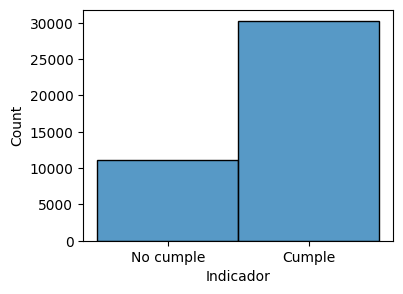

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (4,3))
sns.histplot(data = df, x = "Indicador", bins = 50)
plt.show()

In [69]:
df.to_csv("tickets.csv", index = False)

In [70]:
%pwd

'C:\\Users\\PortatilTI\\Streaming de Google Drive\\Mi unidad\\Unicorn\\Proyecto Integrador Final\\Proyecto\\src'

In [71]:
!pip install seaborn